In [1]:
from scipy.stats import norm, gmean
import numpy as np
import math
from numba import jit, prange
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Структурные продукты с полной защитой капитала

## СП с использованием азиатских опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется рост акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона call.

In [2]:
def Geometric_Average_Rate_Call(S, K , T , r , b , sigma):
  sigmaA = sigma/np.sqrt(3)
  bA = (b - sigma**2/6)/2
  d1 = (np.log(S/K)+(bA + sigmaA**2/2)*T)/(sigmaA*np.sqrt(T))
  d2 = d1 - sigmaA * np.sqrt(T)
  return S * np.exp((bA - r)*T) * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    
def Geometric_Average_Rate_Put(S, K , T , r , b , sigma):
    sigmaA = sigma / np.sqrt(3)
    bA = (b - sigma**2 / 6) / 2
    d1 = (np.log(S/K) + (bA + sigmaA**2 / 2) * T) / (sigmaA * np.sqrt(T))
    d2 = d1 - sigmaA * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp((bA - r) * T) * norm.cdf(-d1)


In [3]:
S = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3

print ('Геометрическая среднее. Стоимость азиатского опциона колл =', Geometric_Average_Rate_Call(S , K , T , r , r-q , sigma))
# 7.906075677449117

Геометрическая среднее. Стоимость азиатского опциона колл = 7.906075677449117


## Задача

Задача. В услових примера вычислите коэффициент участия.

Ответ: PR = 85.5%

In [4]:
option_price = Geometric_Average_Rate_Call(S, K, T, r, r - q, sigma) 
# ST = S*np.exp(r*T) 
ST = np.log(1+r)/T
participation_ratio = (option_price /ST ) * 100
participation_ratio

11685.240328897366

In [5]:
option_price

7.906075677449117

In [6]:
participation_ratio = (option_price /ST) * 100
participation_ratio

11685.240328897366

## Задача

Задача. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется падение акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона put.

Постройте графики выплат для опциона колл и пут. Сделайте выводы.

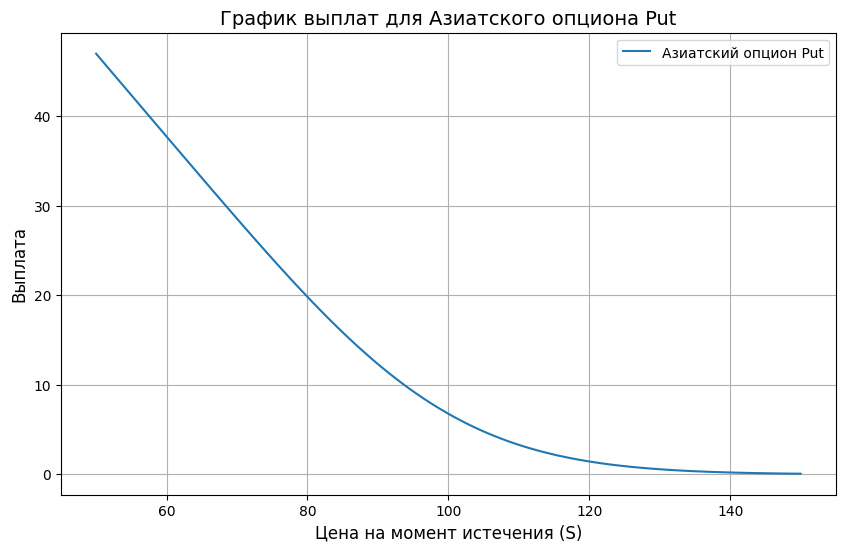

In [7]:
S = 100  
K = 100  
T = 1    
r = 0.07  
b = 0    
sigma = 0.30 
n_steps = 252 

S_range = np.linspace(50, 150, 100)  

put_payoffs = [Geometric_Average_Rate_Put(S, K, T, r, b, sigma) for S in S_range]

plt.figure(figsize=(10, 6))
plt.plot(S_range, put_payoffs, label="Азиатский опцион Put")
plt.xlabel('Цена на момент истечения (S)', fontsize=12)
plt.ylabel('Выплата', fontsize=12)
plt.title('График выплат для Азиатского опциона Put', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


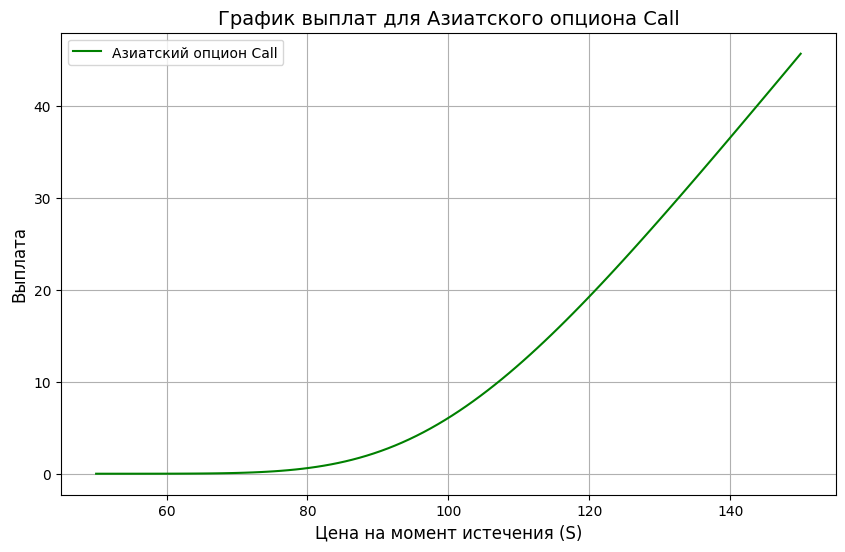

In [8]:
call_payoffs = [Geometric_Average_Rate_Call(S, K, T, r, b, sigma) for S in S_range]

plt.figure(figsize=(10, 6))
plt.plot(S_range, call_payoffs, label="Азиатский опцион Call", color='green')
plt.xlabel('Цена на момент истечения (S)', fontsize=12)
plt.ylabel('Выплата', fontsize=12)
plt.title('График выплат для Азиатского опциона Call', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


## Задача

Задача. Проведите исследование и сравните влияние периодичности наблюдения (1 день, 1 неделя, 1 месяц) на
*   стоимость азиатского опциона,
*   волатильность.

Сделайте выводы, подкрепите выводы иллюстративными графиками.

In [9]:
def Geometric_Average_Rate_Call_2(S, K, T, r, b, sigma, n_obs):
    sigmaA = sigma / np.sqrt(3) * np.sqrt((n_obs + 1) * (2 * n_obs + 1) / (6 * n_obs**2))
    bA = b - sigma**2 / 6 * (1 - 1 / (n_obs + 1))
    d1 = (np.log(S / K) + (bA + sigmaA**2 / 2) * T) / (sigmaA * np.sqrt(T))
    d2 = d1 - sigmaA * np.sqrt(T)
    return S * np.exp((bA - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

1 день: Стоимость опциона = 11.3321, Волатильность = 0.2055
1 неделя: Стоимость опциона = 26.2419, Волатильность = 0.6014
1 месяц: Стоимость опциона = 74.9365, Волатильность = 2.2566


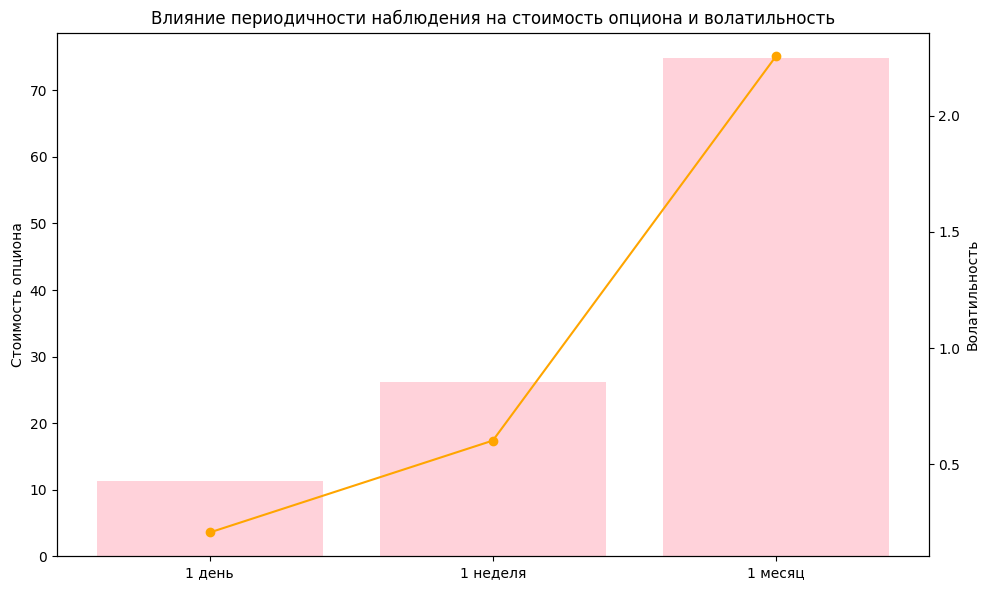

In [10]:
S = 100
K = 100        
T = 1           
r = 0.07      
q = 0.0      
sigma = 0.3    

periods = {"1 день": 252/365, "1 неделя": 52/365, "1 месяц": 12/365}

results = {}
for period, n_obs in periods.items():
    price = Geometric_Average_Rate_Call_2(S, K, T, r, r - q, sigma, n_obs)
    sigmaA = sigma / np.sqrt(3) * np.sqrt((n_obs + 1) * (2 * n_obs + 1) / (6 * n_obs**2))
    results[period] = {"Стоимость опциона": price, "Волатильность": sigmaA}

for period, values in results.items():
    print(f"{period}: Стоимость опциона = {values['Стоимость опциона']:.4f}, Волатильность = {values['Волатильность']:.4f}")

x_labels = list(periods.keys())
prices = [values["Стоимость опциона"] for values in results.values()]
volatilities = [values["Волатильность"] for values in results.values()]


fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(x_labels, prices, color='pink', alpha=0.7, label="Стоимость опциона")
ax1.set_ylabel("Стоимость опциона", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x_labels, volatilities, color='orange', marker='o', label="Волатильность")
ax2.set_ylabel("Волатильность", color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title("Влияние периодичности наблюдения на стоимость опциона и волатильность")
fig.tight_layout()
plt.show()


Пример 2. Оцените стоимость азиатского опциона колл с использованием метода Монте-Карло. При условиях цена базового актива и страйк 100, дата экспирации через 1 год, безрисковая ставка 7%, волатильность 30%. Переодичность наблюдений - 1 день, количество траекторий 1000.

In [11]:
# Box-Muller transform to generate normal deviates
def getGaussian(mu, sigma, n):

	# Generate a pair of uniform random variables U,V
  U = np.random.uniform(0, 1, n)
  V = np.random.uniform(0, 1, n)

  # Get R~Exponential(1) and Theta~Uniform(0, 2pi) random variables
  R     = -np.log(U)
  Theta = 2*np.pi*V

	# Transform to X and Y
  X = np.multiply(np.sqrt(2*R), np.cos(Theta))
  Y = np.multiply(np.sqrt(2*R), np.sin(Theta))

  # Perform location-scale transform
  X = mu + sigma*X
  Y = mu + sigma*Y
  return X, Y

In [12]:
def gbm_mcs(mu, sigma, S0, T, n, noOfPaths):
  S = []
  delta_t = T/n
  # Mean and variance of a lognormal random walk
  mean = S0 * np.exp((mu+(0.5*sigma**2))*T)
  variance = (S0 ** 2)*np.exp(2*mu*T + 2*(sigma ** 2)*T)*(np.exp(sigma**2)*T-1)
  for i in range(noOfPaths):
    X, Y = getGaussian(0, 1, n)
    dz_t = X
    dW_t = np.sqrt(delta_t) * dz_t
    dX_t = mu * delta_t + sigma * dW_t
    X_t = np.cumsum(dX_t)
    S_t = S0 * np.exp(X_t)
    S.append(S_t)
  S = np.array(S)
  return S, mean, variance

In [13]:
S0 = 100

noOfPaths = 1000
T = 1
n = 250

K = 100
r = 0.07

sigma = 0.3
mu = r - (0.5*sigma**2)

In [14]:
# Simulate a lognormal random walk
S, mean, variance = gbm_mcs(mu, sigma, S0, T, n, noOfPaths)
c = 0.0
for i in range(noOfPaths):
  c = c + max(np.mean(S[i]) - K, 0)
disc = np.exp(-r*T)
#c = disc * (c/noOfPaths)
print ('Монте-Карло моделирование. Стоимость азиатского опциона колл =', disc * (c/noOfPaths))
#print(c)

Монте-Карло моделирование. Стоимость азиатского опциона колл = 8.731048388128556


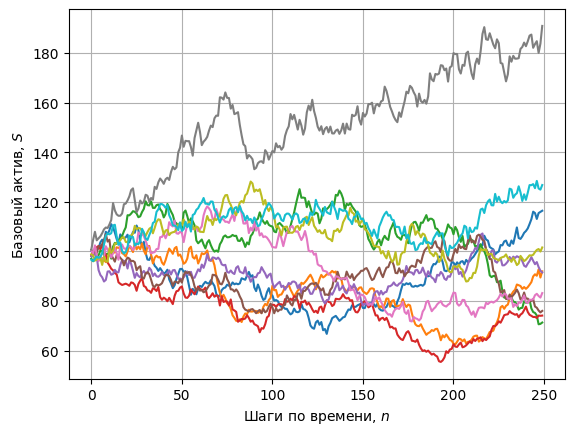

In [15]:
import matplotlib.pyplot as plt

time = list(range(n))
for i in range(10):
  plt.plot(time, S[i])

plt.xlabel('Шаги по времени, $n$')
plt.ylabel('Базовый актив, $S$')
plt.grid(True)
plt.show()

## Задача

Задача. Переписать цикл for и избавиться от использования констант (использовать переменную step).

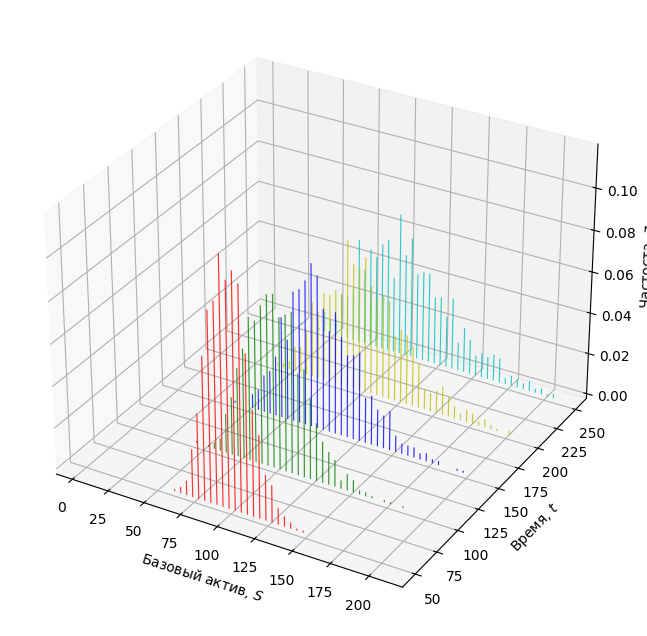

In [16]:
from mpl_toolkits.mplot3d import Axes3D

sd = np.sqrt(variance)
step = 50
noOfPaths = 1000


# Density plot of the underlying price
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111,projection='3d')
x   = np.linspace(mean-3*sd, mean+3*sd, step+1)

#time = list(range(n))

for i,c in zip([50,100,150,200,250],['r','g','b','y','c']):
  hist, bins = np.histogram(S[:,i-1],bins = x)
  hist = hist/noOfPaths
  cs = [c] * 50
  ax.bar(x[:-1],hist, i, zdir = 'y', color=cs,alpha=0.8)

ax.set_xlabel('Базовый актив, $S$')
ax.set_ylabel('Время, $t$')
ax.set_zlabel('Частоста, $z$')

plt.show()

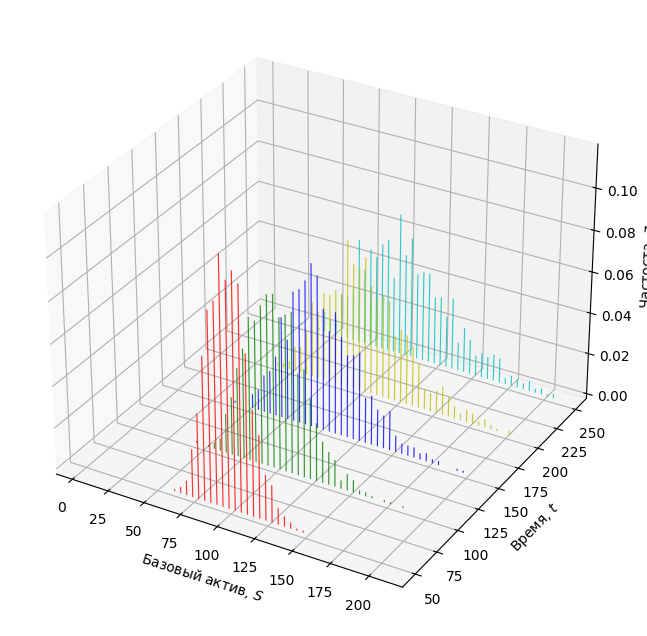

In [17]:
sd = np.sqrt(variance)
step = 50  
noOfPaths = 1000

fig = plt.figure(figsize=(10, 8))
ax  = fig.add_subplot(111, projection='3d')
x   = np.linspace(mean - 3 * sd, mean + 3 * sd, step + 1)

time_indices = range(step, noOfPaths + 1, step)  
colors = ['r', 'g', 'b', 'y', 'c']  

for i, c in zip(time_indices, colors[:len(time_indices)]):
    hist, bins = np.histogram(S[:, i - 1], bins=x)
    hist = hist / noOfPaths
    cs = [c] * (len(x) - 1)
    ax.bar(x[:-1], hist, i, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('Базовый актив, $S$')
ax.set_ylabel('Время, $t$')
ax.set_zlabel('Частоста, $z$')

plt.show()


## Задача

Задача. Проверить гипотезу о том, что на разных временных шагах гистограммы принадлежат одному распределению.

In [18]:
step = 50  
time_indices = range(step, S.shape[1] + 1, step)  
results = []  

# сравнение распределений на парах временных шагов
for i, t1 in enumerate(time_indices):
    for t2 in time_indices[i+1:]:
        sample1 = S[:, t1 - 1]
        sample2 = S[:, t2 - 1]
        
        # тест Колмогорова-Смирнова
        stat, p_value = ks_2samp(sample1, sample2)
        results.append((t1, t2, stat, p_value))

print("Сравнение распределений на временных шагах:")
for t1, t2, stat, p_value in results:
    print(f"Шаги {t1} и {t2}: Статистика = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"  → Распределения на шагах {t1} и {t2} различаются (p < 0.05).")
    else:
        print(f"  → Распределения на шагах {t1} и {t2} одинаковы (p ≥ 0.05).")


Сравнение распределений на временных шагах:
Шаги 50 и 100: Статистика = 0.1080, p-value = 0.0000
  → Распределения на шагах 50 и 100 различаются (p < 0.05).
Шаги 50 и 150: Статистика = 0.1690, p-value = 0.0000
  → Распределения на шагах 50 и 150 различаются (p < 0.05).
Шаги 50 и 200: Статистика = 0.2030, p-value = 0.0000
  → Распределения на шагах 50 и 200 различаются (p < 0.05).
Шаги 50 и 250: Статистика = 0.2270, p-value = 0.0000
  → Распределения на шагах 50 и 250 различаются (p < 0.05).
Шаги 100 и 150: Статистика = 0.0870, p-value = 0.0010
  → Распределения на шагах 100 и 150 различаются (p < 0.05).
Шаги 100 и 200: Статистика = 0.1120, p-value = 0.0000
  → Распределения на шагах 100 и 200 различаются (p < 0.05).
Шаги 100 и 250: Статистика = 0.1430, p-value = 0.0000
  → Распределения на шагах 100 и 250 различаются (p < 0.05).
Шаги 150 и 200: Статистика = 0.0450, p-value = 0.2635
  → Распределения на шагах 150 и 200 одинаковы (p ≥ 0.05).
Шаги 150 и 250: Статистика = 0.0750, p-value =

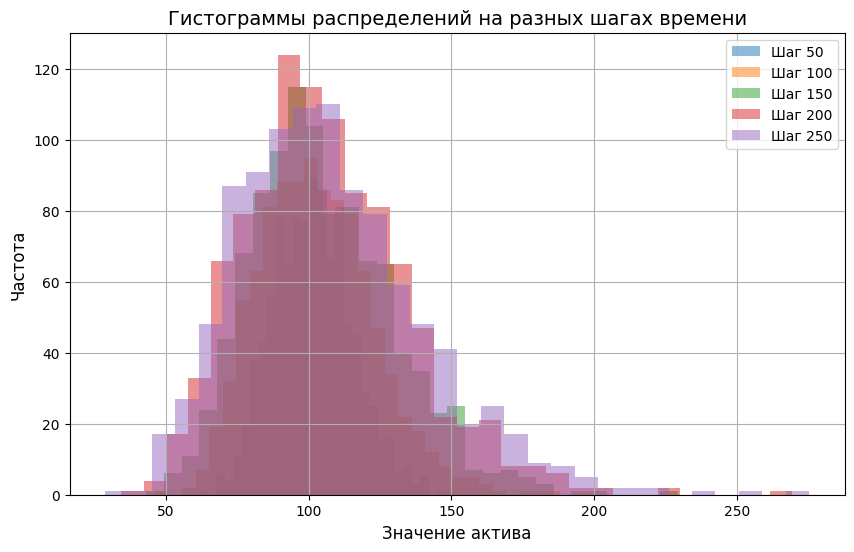

In [19]:
plt.figure(figsize=(10, 6))
for i, t in enumerate(time_indices):
    plt.hist(S[:, t - 1], bins=30, alpha=0.5, label=f"Шаг {t}")
    
plt.xlabel('Значение актива', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Гистограммы распределений на разных шагах времени', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


Пример.
В условиях примера 1

1. Вычислите  результаты от инвестирования используя
формулу выплаты:
$$
r_{SP} =
\max\left( r_{SP \min}, r_{SP \min} + PR \times \frac{P_{avg} - S}{S}\right),
$$
здесь $\frac{P_{avg} - S}{S}$ -- доходность базового актива относительно среднего значения $P_{avg}$, $S$ -- цена начала участия, или страйк встроенных опционов (в
простейшем случае он равен цене спот базового актива на момент выпуска продукта, т.е. $P_0$).

2. Постройте продукт со встроенным азиатским опционом, оцененным методом Монте-Карло. Для уменьшения разброса в качестве control variate использовать геометрическое усреднение. Вычислите доверительный интервал.

3. Сравните полученные результаты с результатами предыдущих задач и подкрепите выводы иллюстративными графиками.

In [20]:
def bs_call_exact(t, s0, k, r, sigma):
    dp = 1 / ( sigma * math.sqrt( t ) ) * ( math.log( s0 / k ) + ( r + sigma**2 / 2) * ( t ) )
    dm = dp - sigma * math.sqrt( t )
    return s0 * norm.cdf(dp) - k * math.exp( - r * t ) * norm.cdf(dm)

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

@jit(nopython=True, inline = 'always')
def wiener(t):
    return math.sqrt( t ) * np.random.normal(0, 1)

@jit(nopython=True, inline = 'always')
def st(t, s0, r, sigma):
    return s0 * math.exp( ( r - sigma**2 / 2) * t + sigma * wiener( t ) )

@jit(parallel=True, nopython=False)
def asian_bs_call_mc_geom(n_iters, T, t_steps, S0, K, r, sigma):
    payoff = np.zeros(n_iters)
    avg_S = np.zeros(n_iters)
    m = len(t_steps)
    for i in prange(0, n_iters):
        geom_avg_s = 0
        S0_j = S0
        for j in range(1, m):
            S_j = st( (t_steps[j] - t_steps[j-1] ) * T, S0_j, r, sigma)
            S0_j = S_j
            geom_avg_s += math.log(S_j)
        geom_avg_s = math.exp(geom_avg_s / ( m - 1))
        avg_S[i] = geom_avg_s
        payoff[i] = math.exp(-r * T) * max(geom_avg_s - K , 0)
    return payoff, avg_S

In [21]:
N_MC = int(10**5)
T, S0, K, r, sigma = 1, 100, 100, 0.07, 0.3
m = 1000
t_steps = np.array([i/m for i in range(0, m + 1)])
payoff_data, S_data = asian_bs_call_mc_geom(N_MC, T, t_steps, S0, K, r, sigma)
asian_call = np.mean(payoff_data)
print(f"asian call = {asian_call:.4f} +- {1.96 / math.sqrt(n) * np.std(payoff_data):.4f} with 95% prob")

asian call = 7.9966 +- 1.4494 with 95% prob


In [22]:
N = 100000

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / asian_call
PR_1 = K * Q_1/ N
S_1 = np.sort(S_data)
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_1 - S0) / S0 )

print(f"asian call r_sp_mean = {np.mean(r_sp_1)}, PR = {PR_1}")

asian call r_sp_mean = 0.07250818125421635, PR = 0.8454383734057136


In [23]:
european_call = bs_call_exact(T, S0, K, r, sigma)
Q_2 = (N - da) / european_call
PR_2 = K * Q_2/ N
S_2 = np.sort(np.array([st(T, S0, r, sigma) for i in range(0, N_MC)]))
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_2 - S0) / S0 )

print(f"european call r_sp_mean = {np.mean(r_sp_2)}, PR = {PR_2}")

european call r_sp_mean = 0.07182578914972097, PR = 0.44447044652333806


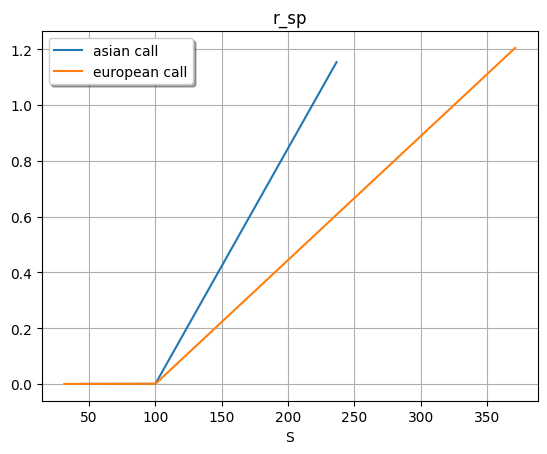

In [24]:
plt.plot(S_1, r_sp_1, label = 'asian call')
plt.plot(S_2, r_sp_2, label = 'european call')

plt.title('r_sp')
plt.xlabel('S')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

In [25]:
S0 = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3
call_price = Geometric_Average_Rate_Call(S0, K , T , r , r-q , sigma)
print ('Geometric average rate call =', call_price)

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Participation rate = ', PR)

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S.mean(axis=1).mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Geometric average rate call = 7.906075677449117
Participation rate =  0.855
Rsp averaged over 1000 samples = 3.45%


In [26]:
# task 2 evaluate asian option price using MC method
import scipy.stats

print('Наблючений:', S.shape)
# geometric averaging
S_means = np.prod(S**(1/S.shape[1]), axis=1)
payoffs = np.exp(-r * T) * np.maximum(S_means - K, 0)
avg_payoff = np.mean(payoffs)
std_error = np.sqrt(np.sum((payoffs - avg_payoff)**2) / (payoffs.shape[0] - 1))
print('Среднее значание функции выплат = ', round(avg_payoff,3))
print('Стандартная ошибка = ', round(std_error, 3))
scaler = scipy.stats.t.ppf((1 + 0.95) / 2., payoffs.shape[0] - 1)
print(f'Доверительный интервал : [{avg_payoff - std_error * scaler:.3f}(0):{avg_payoff + std_error * scaler:.3f}]')

Наблючений: (1000, 250)
Среднее значание функции выплат =  8.249
Стандартная ошибка =  11.716
Доверительный интервал : [-14.741(0):31.240]


In [27]:
# task 3 compare results

print('Analytical Geometric average rate call =', round(call_price, 3))
print('Relative error for MC method = ', round(abs(call_price - avg_payoff) / call_price * 100, 3), '%\n')

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

call_price = call(S0, K , T , sigma , r, q)
print ('Стоимость опциона колл =', round(call_price, 3))

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Коэффициент участия = ', PR * 100, '%')

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S[:, -1].mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Analytical Geometric average rate call = 7.906
Relative error for MC method =  4.342 %

Стоимость опциона колл = 15.211
Коэффициент участия =  44.4 %
Rsp averaged over 1000 samples = 3.48%


Text(0.5, 0, 'Price S_T')

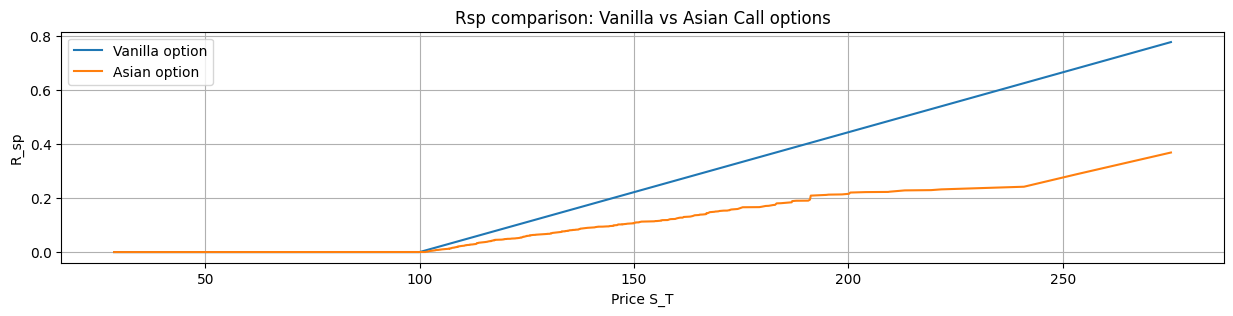

In [28]:
# profit plots
plt.figure(figsize=(15,3))
plt.title('Rsp comparison: Vanilla vs Asian Call options')
rsps = np.maximum(rsp_min, rsp_min + PR * (S[:, -1] - S0)/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps), label='Vanilla option')
rsps2 = np.maximum(rsp_min, rsp_min + PR * payoffs/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps2), label='Asian option')
plt.legend();plt.grid()
plt.ylabel('R_sp')
plt.xlabel('Price S_T')
# according to that payoff for an asian option is dependent on average asset price during the history
# the profit for this product is growth much slower than the one for vanilla option
# but
# it's not necessary has profit starting from price = S0 as below since we plotted only last price
# not average one, so actually it's possible to have positive pnl starting from price much lower

# Задача

Сравните различные методы оценивания (арифметический и Монте-Карло) азиатского опциона для бездивидентных акций:
$S_0= 116,79$, $К= 117$, срок погашения составляет 3 месяца. Волатильность акций составляет 0,02803, а безрисковый процент составляет 0,624% с непрерывным начислением процентов.


https://github.com/olof98johansson/FinancialOptionsModelling

https://webthesis.biblio.polito.it/20278/1/tesi.pdf

In [29]:
def asian_option(T, t,  K, r, sigma, S_0, n, dim, option_type):
        '''
        Вычисление премии азиатского опциона (колл или пут).
        option_type: "call" для колл-опциона, "put" для пут-опциона.
        '''
        T = T - t
        arr_Z = np.random.normal(0, 1, size=(n, dim))
        delta_t = T / (dim - 1)
    
        arr_C = []
        for i in range(n):
            arr_S_i = []
            for j in range(dim - 1):
                if j == 0:
                    S_i = S_0 * np.exp((r - 0.5 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * arr_Z[i][j])
                else:
                    S_i = arr_S_i[j - 1] * np.exp((r - 0.5 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * arr_Z[i][j])
                arr_S_i.append(S_i)
    
            S_mean = np.mean(arr_S_i)
            if option_type == "call":
                C_i = np.exp(-r * T) * max(S_mean - K, 0)
            elif option_type == "put":
                C_i = np.exp(-r * T) * max(K - S_mean, 0)
            arr_C.append(C_i)
    
        return np.mean(arr_C)

In [30]:
import numpy as np

def asian_option_num(T, t, K, r, sigma, S_0, n, dim, option_type='call', spatial_size=3):
    """
    Вычисление стоимости азиатского опциона (call или put) методом конечных разностей.

    Параметры:
        T: Время до экспирации (в годах)
        t: Текущий момент времени
        K: Страйк цена
        r: Безрисковая ставка
        sigma: Волатильность
        S_0: Начальная цена базового актива
        n: Количество временных шагов
        dim: Количество пространственных шагов
        option_type: Тип опциона ('call' или 'put')
        spatial_size: Диапазон цен базового актива
    Возвращает:
        Цена опциона
    """
    T = T - t
    dt = T / n
    dz = 2 * spatial_size / dim
    d = dt / dz**2

    spatial = np.array([-spatial_size + i * dz for i in range(dim + 1)])
    time = np.array([i * dt for i in range(n + 1)])
    u = np.zeros((n + 1, dim + 1))

    # Начальные и граничные условия
    if option_type == 'call':
        u[0, :] = np.maximum(spatial, 0)
        u[:, 0] = 0
        u[:, -1] = spatial_size
    elif option_type == 'put':
        u[0, :] = np.maximum(-spatial, 0)
        u[:, 0] = spatial_size
        u[:, -1] = 0

    for i in range(1, n + 1):
        gamma_f = (1 - np.exp(-r * time[i-1])) / (r * T)
        gamma_b = (1 - np.exp(-r * time[i])) / (r * T)

        arg_f = 0.5 * d * (sigma**2 / 2) * (gamma_f - spatial[1:-1])**2
        arg_b = -0.5 * d * (sigma**2 / 2) * (gamma_b - spatial[1:-1])**2

        A_f = np.diag(1 - 2 * arg_f) + np.diag(arg_f[:-1], 1) + np.diag(arg_f[:-1], -1)
        A_b = np.diag(1 - 2 * arg_b) + np.diag(arg_b[:-1], 1) + np.diag(arg_b[:-1], -1)

        b_f = np.zeros(dim - 1)
        b_b = np.zeros(dim - 1)
        b_f[-1] = spatial_size * 0.5 * d * (sigma**2 / 2) * (gamma_f - spatial[-1])**2
        b_b[-1] = -spatial_size * 0.5 * d * (sigma**2 / 2) * (gamma_b - spatial[-1])**2

        u[i, 1:-1] = (np.linalg.solve(A_b, A_f @ u[i-1, 1:-1]) + 
                      np.linalg.solve(A_b, b_f - b_b))

    z = (1 - np.exp(-r * T)) / (r * T) - K * np.exp(-r * T) / S_0
    correct_z = np.searchsorted(spatial, z)

    return S_0 * u[-1, correct_z]


In [39]:
S0 = 116.79
K = 117
T = 3/12
t = 0
sigma = 0.02803
r = 0.624
dim = 100  
n =  1000
option_type = "call"

In [40]:
price_num = call_price = asian_option(T, t, K, r, sigma, S0, n, dim, option_type)
price_MC = asian_option(T, t,  K, r, sigma, S0, n, dim, option_type)

print(f"Стоимость азиатского колл-опциона: {call_price:.4f}")
print(f"MC  {option_type}-опциона: {price_MC:.4f}")

Стоимость азиатского колл-опциона: 8.1313
MC  call-опциона: 8.1254


# Структурные продукты без гарантии возврата капитала

## Задача.

Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается рост цен на акции «A».  Клиент готов нести 30\% потери в случае падении цены акции <<А>> (меньше чем при прямой покупке акции) в обмен на увеличение коэффициента участия. Текущая цена акции 100 руб.

Входные параметры продукта:
*   базовый актив -- акции,
*   срок -- $T = 1$ год,
*   цена начала участия -- $P_0 = 100$рублей,
*   барьерная цена (тип барьера) -- «включаемый» (knock-in) и «выключаемый» (knock-out),
*   условия наблюдения с целью определения пробития барьера -- частота
наблюдений, длина периода наблюдений, расположение периода наблюдений
в случае, если оно частичное – в начале, середине, конце срока продукта;
*   сценарий поведения базового актива -- рост.

Выходной параметр продукта:
*   коэффициент участия.


Проведите расчеты и вычислите коэффициент участия.

In [41]:
def calculate_participation_coefficient(investment_amount, initial_price, loss_threshold, expected_growth):    
    min_price = initial_price * (1 - loss_threshold)
    final_price = initial_price * (1 + expected_growth / 100)
    income = final_price - initial_price
    client_income = income * 0.7
    price_change = final_price - initial_price
    participation_coefficient = client_income / price_change if price_change != 0 else 0

    return participation_coefficient, min_price, final_price



In [42]:
investment_amount = 100000  
initial_price = 100          
loss_threshold = 0.3         
expected_growth = 50         

coefficient, min_price, final_price = calculate_participation_coefficient(
    investment_amount, initial_price, loss_threshold, expected_growth)

print(f"Коэффициент участия: {coefficient:.2f}")
print(f"Минимальная цена для защиты от потерь: {min_price:.2f} рублей")
print(f"Финальная цена акций после роста: {final_price:.2f} рублей")


Коэффициент участия: 0.70
Минимальная цена для защиты от потерь: 70.00 рублей
Финальная цена акций после роста: 150.00 рублей
